# **An introduction to bivariate signal processing: polarization, quaternions and geometric representations**
# *Eusipco Tutorial, Lyon 2024*


---



---



# **Notebook I**: Installation and basics  
#### (Part of the material presented here is from [Bispy tutorial](https://bispy.readthedocs.io/en/latest/tutorials/index.html))
---
---
Related publication

- "*A general approach for the analysis and filtering of bivariate signals*", J. Flamant, Phd thesis, Lille University, 2018.
[link to the pdf](https://hal.science/tel-01926941)
---
---


## Set up/imports


First install the ``bispy-polar`` package from PyPi. It will install the necessary dependencies. 

In [2]:
!pip install bispy-polar


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


Second, import the BiSPy package and other relevant packages

Now install the necessary packages

In [2]:
import bispy as bsp
import numpy as np
import matplotlib.pyplot as plt
import quaternion

We are good to go now.

## Road map

**What we will be doing in this notebook** :

1. Explore the different basic functions of bispy
2. Familiarise with bivariate signal specificities


# **1. Basic structures in bispy**

## Complex and quaternion variables

**From complex to quaternion array**

BiSPy uses the "symplectic decomposition" to map between complex numbers and quaternions:

$$ x_1, x_2 \in \mathbb{C}_j ↔ x = x_1 + i x_2 \in \mathbb{H}$$

In [3]:
# consider two complex numbers
z1 = np.random.normal(0,1,1) + 1j*np.random.normal(0,1,1)
z2 = np.random.normal(0,1,1) + 1j*np.random.normal(0,1,1)

# and construct a quaternion with them
q = bsp.utils.sympSynth(z1,z2)

print('z1=',z1)
print('z2=',z2)
print('q=',q)

z1= [0.30881332-0.57211191j]
z2= [-1.01758951-0.42414042j]
q= [quaternion(0.308813317283551, -1.01758950588435, -0.57211190517588, -0.424140419495434)]


Note how the quaternion array $q$ is constructed the following way: $q = \Re{(z1)} + i \Re{(z2)} + j \Im{(z1)} + k \Im{(z2)}$

Now, a rapid look at the object we have just defined

In [5]:
whos

Variable     Type       Data/Info
---------------------------------
bsp          module     <module 'bispy' from '/Us<...>kages/bispy/__init__.py'>
np           module     <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
plt          module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
q            ndarray    1: 1 elems, type `quaternion`, 32 bytes
quaternion   module     <module 'quaternion' from<...>/quaternion/__init__.py'>
z1           ndarray    1: 1 elems, type `complex128`, 16 bytes
z2           ndarray    1: 1 elems, type `complex128`, 16 bytes


---

**Basic operations** on quaternion are available

In [6]:
# addition, multiplication by real scalar and substraction
print('q+q - 2q =',q + q - 2*q)
print('q-q =',q - q)
# multiplication, power and inversion
print('q*q - q^2 =', q*q - q**2)
print('q*q^(-1) - 1 =',q*q**(-1) - 1)

q+q - 2q = [quaternion(0, 0, 0, 0)]
q-q = [quaternion(0, 0, 0, 0)]
q*q - q^2 = [quaternion(0, 0, 0, 0)]
q*q^(-1) - 1 = [quaternion(2.22044604925031e-16, -2.1321606476699e-17, -3.28387076178929e-17, -2.32163745767382e-17)]


**Quaternion representation**
Quaternions have several representations.

- Cartesian : $q = a + ib + jc + kd, \quad a, b, c, d \in \mathbb{R}$
- symplectic : $q = z_1 + i z_2, \quad z_1, z_2 \in \mathbb{C}_j$
- polar : $q = |q| e^{i \theta}e^{-k\chi}e^{j \varphi}, \quad \theta \in [-\pi/2,\pi/2], \chi \in [-\pi/4,\pi/4], \phi \in [0, 2\pi)$

It is possible to go from one representation to an other with bispy utils

**From Cartesian to polar** with the *quat2euler* function

In [7]:
# from Cartesian to polar
a,theta,chi,phi = bsp.utils.quat2euler(q)
print('a=',a)
print('theta=',theta)
print('chi=',chi)
print('phi=',phi)

a= [1.27986765]
theta= [-1.48144944]
chi= [0.52834337]
phi= [0.34266949]


In [8]:
# Let us check that it is correct...
eps = q - a*np.exp(quaternion.x*theta)*np.exp(-quaternion.z*chi)*np.exp(quaternion.y*phi)
print('eps=',eps)

eps= [quaternion(0, 0, -1.11022302462516e-16, -5.55111512312578e-17)]


Note that the **exponential** function works for quaternion and **specific quaternions** are available :

In [9]:
# a pure unit quaternion i:
print('i = ',quaternion.x)
# a pure unit quaternion j:
print('j =',quaternion.y)
# a pure unit quaternion k:
print('k =',quaternion.z)
# then play with the imaginary units
print('ijk =',quaternion.x*quaternion.y*quaternion.z)

i =  quaternion(0, 1, 0, 0)
j = quaternion(0, 0, 1, 0)
k = quaternion(0, 0, 0, 1)
ijk = quaternion(-1, 0, 0, 0)


**From polar to Cartesian** with the quat2euler function




In [10]:
q - bsp.utils.euler2quat(a,theta,chi,phi)

array([quaternion(0, 0, -1.11022302462516e-16, -5.55111512312578e-17)],
      dtype=quaternion)

**From Cartesian to symplectic** with the *Sympsplit* function

In [11]:
z1_back,z2_back = bsp.utils.sympSplit(q)
print(z1-z1_back)
print(z2-z2_back)

[0.+0.j]
[0.+0.j]


# **2. Monochromatic bivariate signals: geometric and Stokes parameters**

We will know explore how to use the function ``bivariateAMFM`` from the ``bispy.signals`` module to generate basic monochromatic signals.

The ``bivariateAMFM`` function generates bivariate signals using their quaternion embedding (see time-frequency notebook for more details).

Monochromatic signals are characterized by constant $a, \theta, \chi$ parameters and a linear phase $\phi(t) = 2\pi f_0 t + \phi_0$ where $f_0$ is the frequency and $\phi_0$ is an initial phase.


In [12]:
N = 2048 # Number of samples
t = np.linspace(0,1,N) # time array
f0 = 10 # signal frequency in Hz

a = 1
theta = np.pi/7 # should be between -pi/2 and pi/2
chi = -0.2 # should be between -pi/4 and pi/4
phi0 = 0
phi = 2*np.pi*f0*t +phi0

x = bsp.signals.bivariateAMFM(a, theta, chi, phi)

We can display this signal in 2D

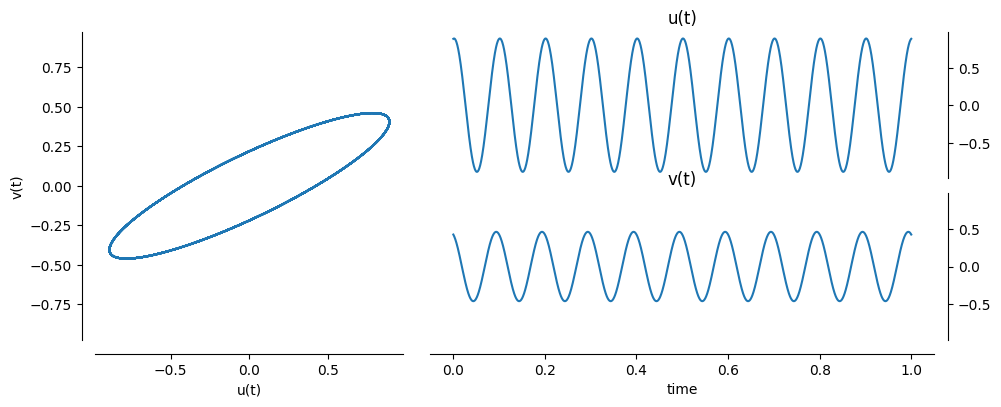

In [13]:
bsp.utils.visual.plot2D(t, x);

and in 3D!

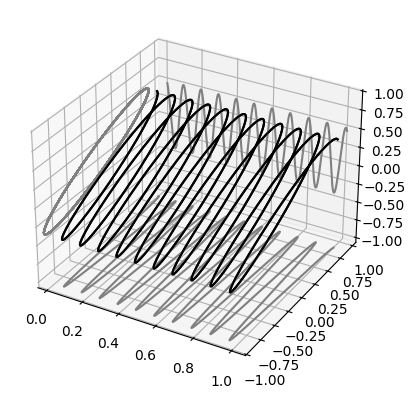

In [15]:
bsp.utils.visual.plot3D(t, x);

we can use functions from ``bispy.utils`` to compute corresponding Stokes parameters.

In [16]:
S0, S1, S2, S3 = bsp.utils.geo2Stokes(a, theta, chi)

print(S0, S1, S2, S3)

1 0.574272136650667 0.7201144823847527 -0.3894183423086505


We can compute the QFT of this signal using functions in ``bispy.qfft``

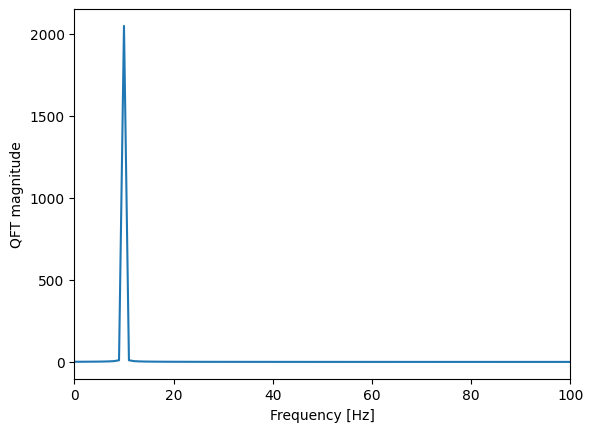

In [17]:
X = bsp.qfft.Qfft(x) # compute the QFT
f = np.fft.fftfreq(N, d=t[1]-t[0])


# display absolute value of QFT
plt.plot(f[:N//2], np.abs(bsp.qfft.Qfft(x)[:N//2]))
plt.xlim(0, 100);
plt.xlabel('Frequency [Hz]');
plt.ylabel('QFT magnitude');